<a href="https://colab.research.google.com/github/TrongAnh2210/Exercise_5/blob/main/inclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=54b2a86be7611ff473bc0256985ba9f7cadaba49c3fe56cf5a255aa6d10a7867
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


### DC MOTOR

In [ ]:
import numpy as np 
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
universe = np.linspace(18,30,100)
universe1 = np.linspace(-5,60,100)
universe2 = np.linspace(0,255,100)
setpoint = ctrl.Antecedent(universe,'setpoint')
valsensor = ctrl.Antecedent(universe1,'valsensor')
pwm = ctrl.Consequent(universe2, 'pwm')
names =['LOW','MEDIUM','HIGH']
names1 =['G','V','X']
names2 =['LOW','MEDIUM','HIGH']
setpoint.automf(names=names)
setpoint.view()
valsensor.automf(names=names1)
valsensor.view()
pwm.automf(names=names2)
pwm.view()
rule0 = ctrl.Rule(antecedent=((setpoint['LOW']&valsensor['G'])|(setpoint['LOW']&valsensor['V'])|(setpoint['MEDIUM']&valsensor['G'])|(setpoint['HIGH']&valsensor['G'])),consequent=pwm['LOW'],label= 'LOW')
rule1 = ctrl.Rule(antecedent=((setpoint['MEDIUM']&valsensor['V'])),consequent=pwm['MEDIUM'],label= 'MEDIUM')
rule2 = ctrl.Rule(antecedent=((setpoint['LOW']&valsensor['X'])|(setpoint['MEDIUM']&valsensor['X'])|(setpoint['HIGH']&valsensor['X'])|(setpoint['HIGH']&valsensor['V'])),consequent=pwm['HIGH'],label= 'HIGH')
system = ctrl.ControlSystem(rules=[rule0, rule1, rule2])
sim = ctrl.ControlSystemSimulation(system,flush_after_run= 100*100+1)
upsampled = np.linspace(18,30,100)
upsampled2 = np.linspace(-5,60,100)
x,y = np.meshgrid(upsampled,upsampled2)
z= np.zeros_like(x)
for i in range(100):
  for j in range(100):
    sim.input['setpoint']= x[i,j]
    sim.input['valsensor']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['pwm']
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize =(8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z,rstride=1, cstride=1, cmap='viridis',linewidth = 0.4,antialiased= True)
"""
cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)
"""
ax.view_init(30,230)

### MOBILE ROBOT

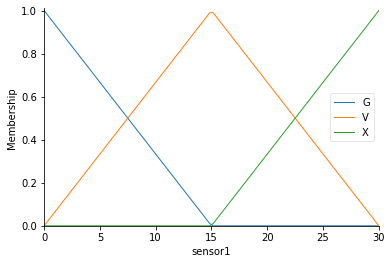

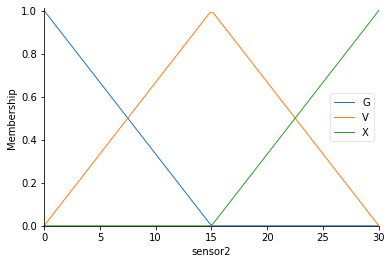

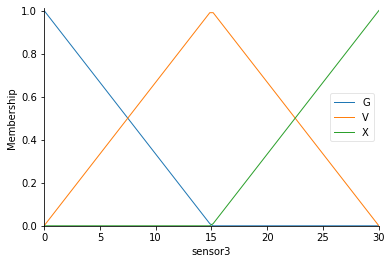

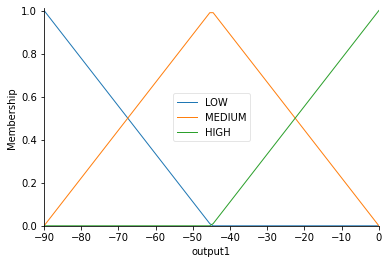

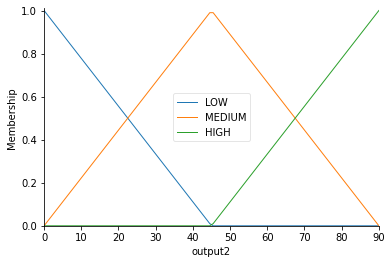

In [2]:
import numpy as np 
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
universe = np.linspace(0,30,100)
universe1 = np.linspace(-90,0,100)
universe2 = np.linspace(0,90,100)
sensor1 = ctrl.Antecedent(universe,'sensor1')
sensor2 = ctrl.Antecedent(universe,'sensor2')
sensor3 = ctrl.Antecedent(universe,'sensor3')
output1 = ctrl.Consequent(universe1, 'output1')
output2 = ctrl.Consequent(universe2, 'output2')
names =['LOW','MEDIUM','HIGH']
names1 =['G','V','X']
sensor1.automf(names=names1)
sensor1.view()
sensor2.automf(names=names1)
sensor2.view()
sensor3.automf(names=names1)
sensor3.view()
output1.automf(names=names)
output1.view()
output2.automf(names=names)
output2.view()

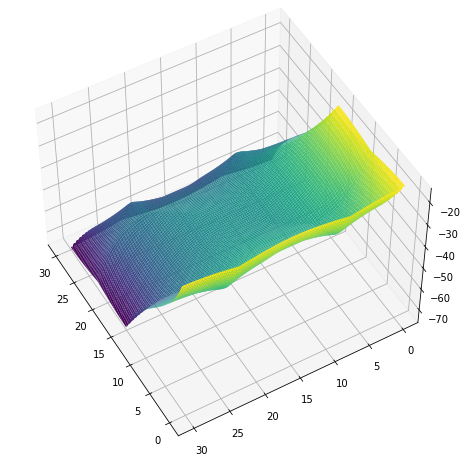

In [3]:
rule0 = ctrl.Rule(antecedent=((sensor1['G']&sensor2['G'])|(sensor1['G']&sensor2['V'])|(sensor1['V']&sensor2['G'])|(sensor1['G']&sensor2['X'])),consequent=output1['HIGH'],label= 'HIGH_RIGHT')
rule1 = ctrl.Rule(antecedent=((sensor1['V']&sensor2['V'])),consequent=output1['MEDIUM'],label= 'MEDIUM')
rule2 = ctrl.Rule(antecedent=((sensor1['X']&sensor2['G'])|(sensor1['X']&sensor2['V'])|(sensor1['X']&sensor2['X'])|(sensor1['V']&sensor2['X'])),consequent=output1['LOW'],label= 'LOW_RIGHT')
system1 = ctrl.ControlSystem(rules=[rule0, rule1, rule2])
sim = ctrl.ControlSystemSimulation(system1,flush_after_run= 100*100+1)
upsampled = np.linspace(0,30,100)
upsampled2 = np.linspace(0,30,100)
x,y = np.meshgrid(upsampled,upsampled2)
z= np.zeros_like(x)
for i in range(100):
  for j in range(100):
    sim.input['sensor1']= x[i,j]
    sim.input['sensor2']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['output1']
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize =(8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z,rstride=1, cstride=1, cmap='viridis',linewidth = 0.4,antialiased= True)
"""
cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)
"""
ax.view_init(50,150)

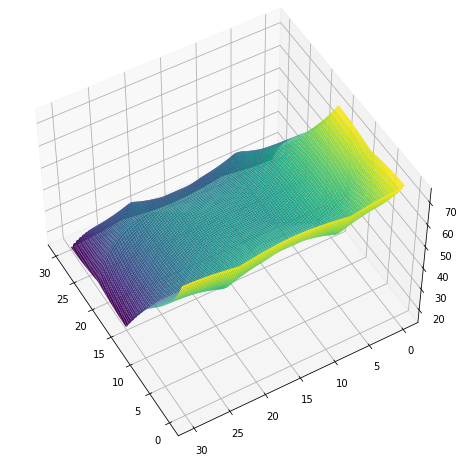

In [4]:
rule3 = ctrl.Rule(antecedent=((sensor3['G']&sensor2['G'])|(sensor3['G']&sensor2['V'])|(sensor3['V']&sensor2['G'])|(sensor3['G']&sensor2['X'])),consequent=output2['HIGH'],label= 'HIGH_RIGHT')
rule4 = ctrl.Rule(antecedent=((sensor3['V']&sensor2['V'])),consequent=output2['MEDIUM'],label= 'MEDIUM')
rule5 = ctrl.Rule(antecedent=((sensor3['X']&sensor2['G'])|(sensor3['X']&sensor2['V'])|(sensor3['X']&sensor2['X'])|(sensor3['V']&sensor2['X'])),consequent=output2['LOW'],label= 'LOW_RIGHT')
system2 = ctrl.ControlSystem(rules=[rule3, rule4, rule5])
sim = ctrl.ControlSystemSimulation(system2,flush_after_run= 100*100+1)
upsampled = np.linspace(0,30,100)
upsampled2 = np.linspace(0,30,100)
x,y = np.meshgrid(upsampled,upsampled2)
z= np.zeros_like(x)
for i in range(100):
  for j in range(100):
    sim.input['sensor3']= x[i,j]
    sim.input['sensor2']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['output2']
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize =(8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z,rstride=1, cstride=1, cmap='viridis',linewidth = 0.4,antialiased= True)
"""
cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)
"""
ax.view_init(50,150)